 # 1) Delivery_time -> Predict delivery time using sorting time 

  * Build a simple linear regression model by performing EDA and do necessary transformations 
  * and select the best model using R or Python.

In [1]:
# 1) Delivery_time -> Predict delivery time using sorting time  
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# import dataset
delivery=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Regression\\Simple Linear Regression\\delivery_time.csv",encoding='latin1')
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

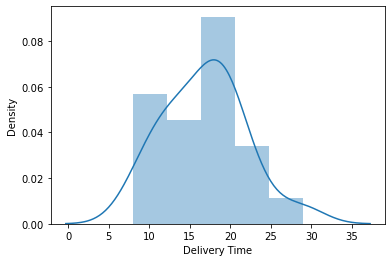

In [4]:
sns.distplot(delivery['Delivery Time'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

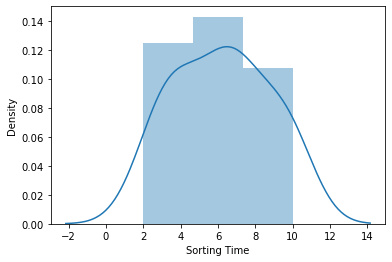

In [5]:
sns.distplot(delivery['Sorting Time'])

In [6]:
# Renaming Columns
delivery=delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
delivery

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
delivery.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

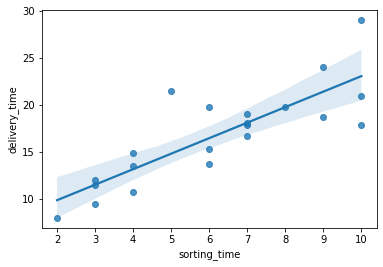

In [8]:
sns.regplot(x=delivery['sorting_time'],y=delivery['delivery_time'])

In [9]:
model=smf.ols("delivery_time~sorting_time",data=delivery).fit()


In [10]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [11]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [12]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [13]:
# Model Predictions
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [14]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [15]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [16]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

  # 2) Salary_hike -> Build a prediction model for Salary_hike

In [17]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [18]:
# import dataset
salary=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Regression\\Simple Linear Regression\\Salary_Data.csv")
salary
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

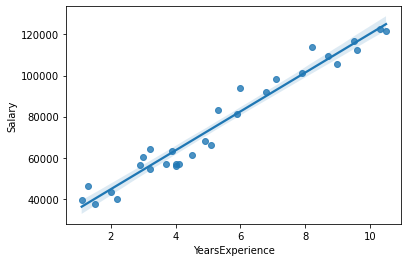

In [19]:
sns.regplot(x=salary['YearsExperience'],y=salary['Salary'])

In [20]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [21]:
# Fitting a Linear Regression Model
# model = smf.ols("y~x",data=defined_data).fit()   ; ols= ordinary least square method

model=smf.ols("Salary~YearsExperience",data=salary).fit()

In [22]:
# as Y = Beta0 + Beta1*(X)
# Finding Coefficient Parameters (Beta0 and Beta1 values)
# Here, (Intercept) Beta0 value = 25792.200 & (YearsExperience) Beta1 value = 9449.96

model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [23]:
# (Intercept) Beta0:  
# (daily)     Beta1:  
# As (pvalue=0)<(α=0.05); Reject Null hyp . Thus, X(yearsexperience) variable has good slope 
# and variance w.r.t Y(salary) variable. 

print(model.tvalues ,'\n', model.pvalues)


Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [24]:
# R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

# Determination Coefficient = rsquared value = 0.9554 ; very good fit = 95.54%


model.rsquared ,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [25]:
# TO predicting Model

In [26]:
# Manual prediction for say 5 Years Experience
Salary = (25792.200199) + (9449.962321)*(5)
Salary

73042.01180400001

In [27]:
new_data=pd.Series([5,6])
new_data

0    5
1    6
dtype: int64

In [28]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,6


In [29]:
model.predict(data_pred)

0    73042.011806
1    82491.974127
dtype: float64

 #  Multi_Linear Regression
 * Consider only the below columns and prepare a prediction model for predicting Price.
 * Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [30]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [31]:
# import dataset
toyo=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Regression\\Multi Linear Regression\\ToyotaCorolla.csv",encoding='latin')
toyo

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [32]:
toyo.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [33]:
toyo1=pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)
toyo1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [34]:
toyo2=toyo1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyo2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [35]:
toyo2[toyo2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [36]:
toyo3=toyo2.drop_duplicates().reset_index(drop=True)
toyo3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [37]:
toyo3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [38]:
model=smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight",data=toyo3).fit()

In [39]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [40]:
np.round(model.tvalues,4) , np.round(model.pvalues,4)

(Intercept    -3.8753
 Age         -46.5519
 KM          -16.5524
 HP           11.2097
 CC           -1.3164
 Doors        -0.0230
 Gears         3.0346
 QT            2.9442
 Weight       15.7607
 dtype: float64,
 Intercept    0.0001
 Age          0.0000
 KM           0.0000
 HP           0.0000
 CC           0.1882
 Doors        0.9816
 Gears        0.0025
 QT           0.0033
 Weight       0.0000
 dtype: float64)

In [41]:
model.rsquared , model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [42]:
#Calculate which is significant variable or not..

In [43]:
model=smf.ols("Price~CC",data=toyo3).fit()
model.tvalues , np.round(model.pvalues,4)

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    0.0
 CC           0.0
 dtype: float64)

In [44]:
model=smf.ols("Price~Doors",data=toyo3).fit()
model.tvalues , np.round(model.pvalues,4)

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    0.0
 Doors        0.0
 dtype: float64)

In [45]:
model=smf.ols("Price~Doors+CC",data=toyo3).fit()
model.tvalues , np.round(model.pvalues,4)

(Intercept    12.786341
 Doors         6.752236
 CC            4.268006
 dtype: float64,
 Intercept    0.0
 Doors        0.0
 CC           0.0
 dtype: float64)

In [46]:
## Calculating VIF values for collinearity check.

In [47]:
a1=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_age=1/(1-a1)
a2=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_km=1/(1-a2)
a3=smf.ols('HP~KM+Age+CC+Doors+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_hp=1/(1-a3)
a4=smf.ols('CC~KM+HP+Age+Doors+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_cc=1/(1-a4)
a5=smf.ols('Doors~KM+HP+CC+Age+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_doors=1/(1-a5)
a6=smf.ols('QT~KM+HP+CC+Doors+Gears+Age+Weight',data=toyo3).fit().rsquared
vif_qt=1/(1-a6)
a7=smf.ols('Weight~KM+HP+CC+Doors+Gears+QT+Age',data=toyo3).fit().rsquared
vif_weight=1/(1-a7)
a8=smf.ols('Gears~KM+HP+CC+Doors+Weight+QT+Age',data=toyo3).fit().rsquared
vif_gears=1/(1-a8)

a9 = pd.DataFrame({'Variable':['age','km','hp','cc','doors','qt','weight','gears'],
                  'Values':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_qt,vif_weight,vif_gears]})
a9



,Variable,Values
0,age,1.876236
1,km,1.757178
2,hp,1.419180
3,cc,1.163470
4,doors,1.155890
5,qt,2.295375
6,weight,2.487180
7,gears,1.098843


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


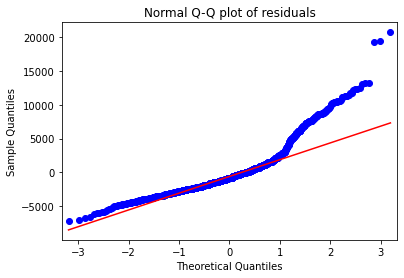

In [48]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [49]:
list(np.where(model.resid>15000))  # outliar detection from above QQ plot of residuals

[array([109, 110, 111], dtype=int64)]

In [50]:
list(np.where(model.resid<-15000))

[array([], dtype=int64)]

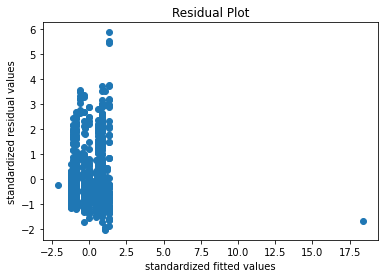

In [51]:
def standard_values(vals) : return (vals-vals.mean())/vals.std() 
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

 * Model Deletion Diagnostics (checking Outliers or Influencers)
 * Two Techniques : 1. Cook's Distance & 2. Leverage value

In [52]:
 # Cook Distance

(c,_)=model.get_influence().cooks_distance
c

array([5.91830003e-04, 6.92308527e-04, 7.78360699e-04, ...,
       7.63204330e-05, 2.98861206e-04, 7.47823212e-04])

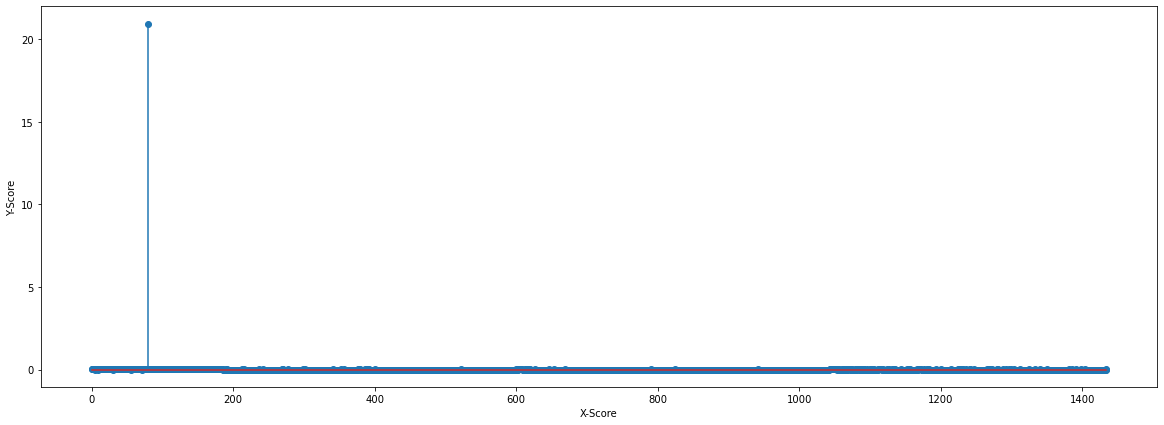

In [53]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyo3)),np.round(c,3))
plt.xlabel('X-Score')
plt.ylabel('Y-Score')
plt.show()

In [54]:
np.argmax(c),np.max(c)

(80, 20.94209108218512)

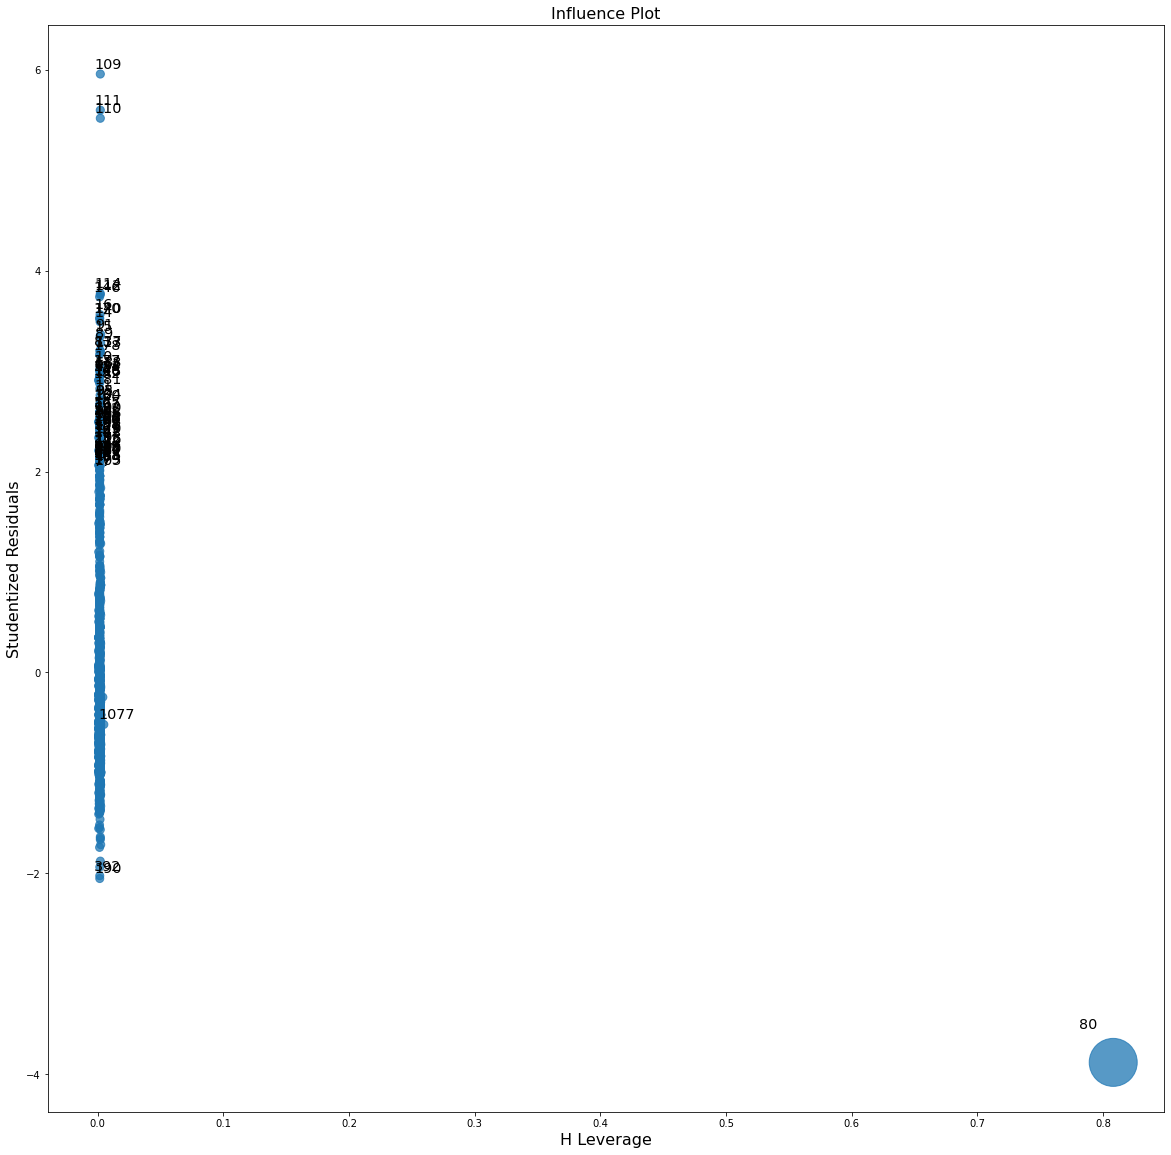

In [55]:
# Influence PLots

fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)


In [56]:
K=toyo3.shape[1]
n=toyo3.shape[0]
values = (3*(K+1)/n)
values

0.020905923344947737

In [57]:
newtoyo=toyo3.copy()

In [58]:
newtoyo

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [59]:
newtoyo=newtoyo.drop(newtoyo.index[80],axis=0).reset_index(drop=True)

In [60]:
newtoyo

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [61]:
# Model Deletion Diagnosis and Final Model

while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=newtoyo).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    newtoyo=newtoyo.drop(newtoyo.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    newtoyo
else:
    final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=newtoyo).fit()
    final_model.rsquared , final_model.aic
    print(" model accuracy is improved to",final_model.rsquared)

 model accuracy is improved to 0.8882395145171204


In [62]:
 # Model Prediction
    
randomdata = pd.DataFrame({ 'Age':24,'KM':40000,'HP':92,'CC':2002,'Doors':4,'Gears':8,'QT':215,'Weight':1190 },index=[0])
randomdata
final_model.predict(randomdata)

0    18506.369738
dtype: float64

In [63]:
randomdata

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,24,40000,92,2002,4,8,215,1190


In [64]:
final_model.predict(toyo3)

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1430     9161.230587
1431     8536.091326
1432     8681.531063
1433     8793.668694
1434    10860.695492
Length: 1435, dtype: float64

  
  # Startup Data 
  * Prepare a prediction model for profit of 50_startups data.
  * Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [65]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot


In [66]:
startup=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Regression\\Multi Linear Regression\\50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [67]:
startup=startup.drop('State',axis=1)
startup.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [68]:
startup=startup.rename({'R&D Spend':'RDSpend','Marketing Spend':'MarketingSpend'},axis=1)

In [69]:
startup.columns

Index(['RDSpend', 'Administration', 'MarketingSpend', 'Profit'], dtype='object')

In [70]:
model=smf.ols("Profit~RDSpend+Administration+MarketingSpend",data=startup).fit()

In [71]:
model.params

Intercept         50122.192990
RDSpend               0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

In [72]:
model.tvalues , np.round(model.pvalues,5)

(Intercept          7.626218
 RDSpend           17.846374
 Administration    -0.525507
 MarketingSpend     1.655077
 dtype: float64,
 Intercept         0.00000
 RDSpend           0.00000
 Administration    0.60176
 MarketingSpend    0.10472
 dtype: float64)

In [73]:
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [74]:
model=smf.ols("Profit~MarketingSpend",data=startup).fit()
model. tvalues , np.round(model.pvalues)

(Intercept         7.808356
 MarketingSpend    7.802657
 dtype: float64,
 Intercept         0.0
 MarketingSpend    0.0
 dtype: float64)

In [75]:
model=smf.ols("Profit~Administration",data=startup).fit()
model. tvalues , model.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [76]:
model=smf.ols("Profit~Administration+MarketingSpend",data=startup).fit()
model. tvalues , model.pvalues

(Intercept         1.142741
 Administration    2.467779
 MarketingSpend    8.281039
 dtype: float64,
 Intercept         2.589341e-01
 Administration    1.729198e-02
 MarketingSpend    9.727245e-11
 dtype: float64)

In [77]:
# Calculating VIF values

a=smf.ols("RDSpend~Administration+MarketingSpend",data=startup).fit().rsquared
vif_rdspend=1/(1-a)
b=smf.ols("Administration~RDSpend+MarketingSpend",data=startup).fit().rsquared
vif_admin=1/(1-b)
c=smf.ols("MarketingSpend~Administration+RDSpend",data=startup).fit().rsquared
vif_market=1/(1-c)
df=pd.DataFrame( {"RdSpend":vif_rdspend ,"Admin":vif_admin,"Market":vif_market },index=[0])
df


,RdSpend,Admin,Market
0,2.468903,1.175091,2.326773


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


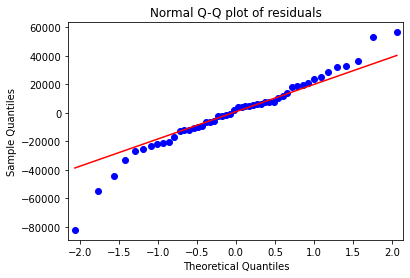

In [78]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [79]:
list(np.where(model.resid<-60000))

[array([46], dtype=int64)]

In [80]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

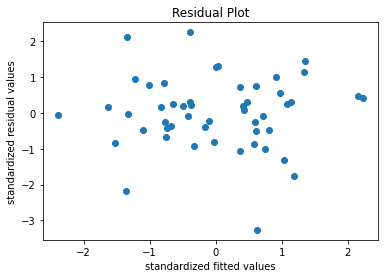

In [81]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

 * Cook Distance 


In [82]:
(c,_)=model.get_influence().cooks_distance
c

array([8.39838700e-03, 1.14873969e-02, 6.56987381e-02, 2.88908332e-02,
       2.79709140e-02, 7.16804815e-03, 8.13809711e-02, 1.85241010e-03,
       1.22027331e-03, 6.61733180e-03, 1.35247093e-02, 2.53489557e-02,
       3.94174194e-03, 8.02036367e-04, 1.42016284e-04, 2.95081144e-04,
       3.35884284e-05, 3.42132384e-03, 6.54885653e-04, 1.85078551e-01,
       2.84861879e-03, 3.73520912e-02, 1.07497235e-02, 9.56175936e-03,
       9.85963822e-03, 1.13174355e-03, 6.78641890e-04, 5.41616669e-02,
       2.51507334e-03, 7.15285794e-04, 8.58305042e-03, 1.29034322e-03,
       1.89459286e-02, 1.59981468e-03, 2.23714369e-02, 1.78833318e-04,
       4.72063572e-03, 1.73121433e-03, 2.62609290e-03, 3.20831672e-03,
       6.39845206e-03, 3.86442369e-03, 6.51113096e-03, 1.04035178e-05,
       8.39238900e-03, 7.75857331e-04, 1.11357048e-01, 2.36146516e-02,
       2.91586816e-04, 9.90987637e-02])

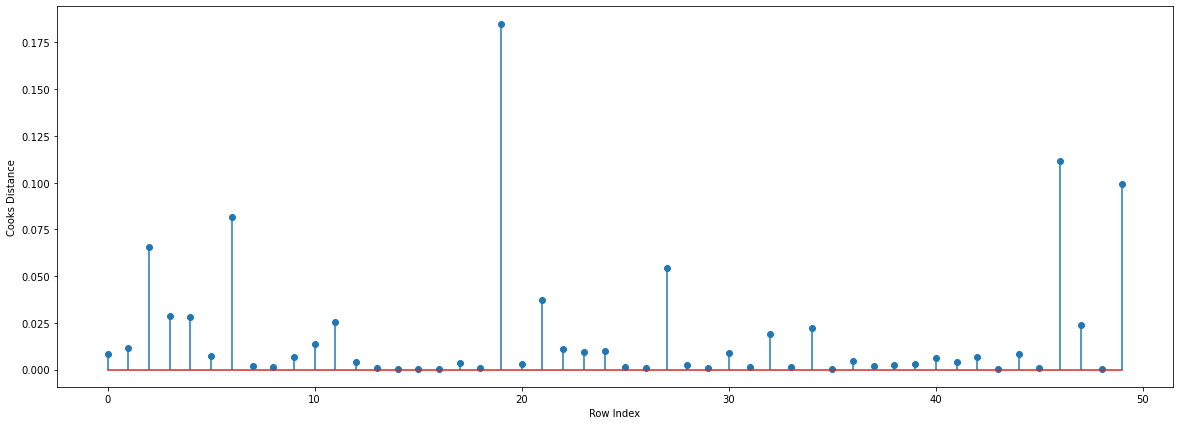

In [83]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [84]:
np.max(c) , np.argmax(c)

(0.1850785514512054, 19)

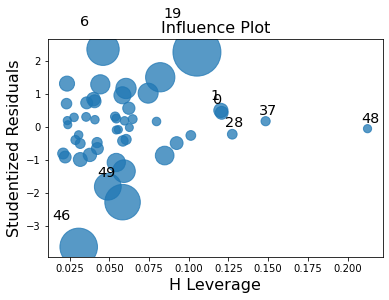

In [85]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [86]:
k=startup.shape[1]
n=startup.shape[0]
influence_p=3*(k+1)/n
influence_p

0.3

In [87]:
startup[startup.index.isin([19])] 

,RDSpend,Administration,MarketingSpend,Profit
19,86419.7,153514.11,0.0,122776.86


In [88]:
startup=startup.drop(startup.index[19]).reset_index(drop=True)

In [89]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDSpend+Administration+MarketingSpend",data=startup).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    startup=startup.drop(startup.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startup
else:
    final_model=smf.ols("Profit~RDSpend+Administration+MarketingSpend",data=startup).fit()
    final_model.rsquared , final_model.aic
    print("Model accuracy",final_model.rsquared)
    

Model accuracy 0.9514573147982069


  * Model Predictions

In [90]:
newdata=pd.DataFrame({ "RDSpend" : 80000 ,"Administration" : 90000, "MarketingSpend" : 140000 },index=[0])
newdata

,RDSpend,Administration,MarketingSpend
0,80000,90000,140000


In [91]:
final_model.predict(newdata)

0    115378.874842
dtype: float64

In [92]:
final_model.predict(startup)

0     192725.065001
1     189207.497750
2     182191.243385
3     173674.985155
4     172096.349396
5     163624.738253
6     156694.477230
7     159778.515241
8     151538.526591
9     154682.646599
10    135123.464241
11    135354.562231
12    128936.076874
13    127309.624080
14    149023.129096
15    145865.152472
16    116994.596402
17    130136.396083
18    129118.991669
19    116950.043206
20    117538.721133
21    115054.696118
22    110459.902955
23    112785.539478
24    101719.449397
25    109925.275641
26    115054.355485
27    100934.240001
28    101064.857860
29     98740.833536
30     96903.007188
31     97990.758491
32     98009.982782
33     89121.254272
34     90699.202198
35     75578.524682
36     89842.465905
37     70109.108753
38     83834.033210
39     74960.435460
40     74970.595883
41     70723.891913
42     59667.057149
43     63941.670569
44     47135.917828
45     57352.226955
46     45956.491107
47     48781.719624
48     47972.803472
dtype: float64

 # Logistic Regression

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [94]:
bank=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Regression\\Logistics Regression\\bank-full.csv")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [95]:
bank=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [96]:
pd.set_option("display.max.columns",None)
bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [97]:
bank['default']=np.where(bank['default'].str.contains("yes"),1,0)

In [98]:
bank['housing']=np.where(bank['housing'].str.contains("yes"),1,0)
bank['loan']=np.where(bank['loan'].str.contains("yes"),1,0)
bank['y']=np.where(bank['y'].str.contains("yes"),1,0)
bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [99]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

 * Model Building

In [100]:
x=pd.concat([bank.iloc[:,0:10],bank.iloc[:,11:]],axis=1)
y=bank.iloc[:,10]

x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [101]:
classify=LogisticRegression()
classify.fit(x,y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* Model Prediction 

In [102]:
y_predict=classify.predict(x)
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [103]:
predict=pd.DataFrame({ "Actual Y": y,"Predicted Y" : y_predict})
predict

,Actual Y,Predicted Y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [104]:
# Confusion Matrix

confusion_matrix=confusion_matrix(y,y_predict)
confusion_matrix

array([[39164,   758],
       [ 4147,  1142]], dtype=int64)

In [105]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)

(39164+1142)/(39167+758+4147+1142)


0.8914495510240191

In [106]:
# As accuracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
classify.predict_proba(x)[:,1] 

array([0.05552735, 0.02988275, 0.02124972, ..., 0.68124682, 0.08478827,
       0.09414945])

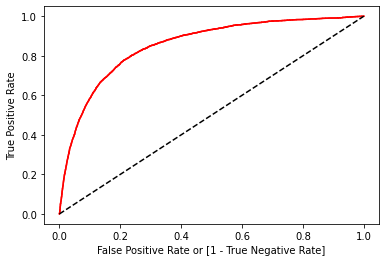

auc accuracy: 0.5984664044593897


In [107]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds=roc_curve(y,classify.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y,y_predict)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)